In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
rows = {"Oil":[883],'Natural Gas':[5915.3], 'Coal':[9723.4], 'Nuclear':[2635.6], 'Hydro':[4059.9], 'Renewables':[2151.5]}
energy_usage = pd.DataFrame(rows)

energy_usage


,Oil,Natural Gas,Coal,Nuclear,Hydro,Renewables
0,883,5915.3,9723.4,2635.6,4059.9,2151.5


In [104]:
energy_usage_with_total = energy_usage.copy()
energy_usage_with_total['total'] = energy_usage.sum(axis=1)
energy_usage_with_total

,Oil,Natural Gas,Coal,Nuclear,Hydro,Renewables,total
0,883,5915.3,9723.4,2635.6,4059.9,2151.5,25368.7


In [105]:
energy_usage_perc = energy_usage_with_total.div(energy_usage_with_total['total'], axis=0)
energy_usage_perc

,Oil,Natural Gas,Coal,Nuclear,Hydro,Renewables,total
0,0.034807,0.233173,0.383283,0.103892,0.160036,0.084809,1.0


In [107]:
energy_usage_long = pd.melt(energy_usage_perc, value_vars=['Oil','Natural Gas','Coal','Nuclear','Hydro','Renewables'], var_name="Energy Source")

energy_usage_long.value = energy_usage_long.value*100
energy_usage_long['Carbon Emissions'] = [314,227,414,0,0,0]

energy_usage_long

,Energy Source,value,Carbon Emissions
0,Oil,3.480667,314
1,Natural Gas,23.317316,227
2,Coal,38.328334,414
3,Nuclear,10.389180,0
4,Hydro,16.003579,0
5,Renewables,8.480923,0


In [109]:
energy_usage_long = energy_usage_long.rename(columns={"value":"Percentage (%)"})

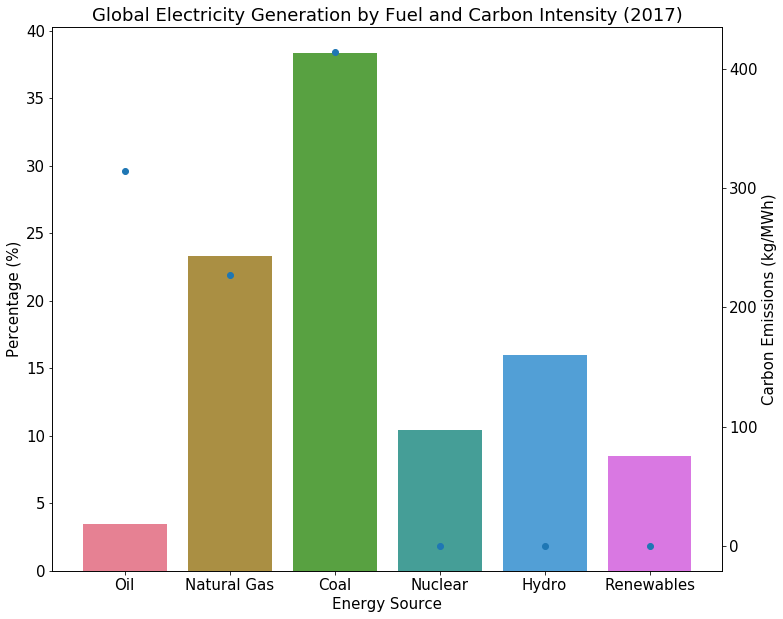

In [121]:

pal = sns.color_palette("husl")
sns.barplot(x='Energy Source', y='Percentage (%)', data=energy_usage_long, palette=pal)
ax2 = plt.twinx()
plt.scatter(data=energy_usage_long, x='Energy Source', y= 'Carbon Emissions')
plt.title("Global Electricity Generation by Fuel and Carbon Intensity (2017)")
plt.ylabel("Carbon Emissions (kg/MWh)")
plt.rcParams['figure.figsize'] = 12, 10

plt.rcParams.update({'font.size': 15})
plt.savefig('elec_gen_carbon.png')